In [14]:
#ALL VALUES (EXCLUDING KNOWN PHYSICAL CONSTANTS) WERE RETRIEVED DIRECTLY OR INDIRECTLY FROM OM10
#LINK: https://arxiv.org/pdf/1001.2037.pdf (section 2.3)

import math
import numpy as np
from astropy.cosmology import FlatLambdaCDM, Planck18
import matplotlib.pyplot as plt

def calc_lum(z, i_mag, abs_mag, alpha, beta, phi, threshold_z):
    quasar_lum_list = []
    for i in range(len(z)) and j in range(len(i_mag)):
        alpha1 = alpha  # Use the current value of alpha
        if z[i] > threshold_z and j <= range(len(i_mag)):
            # Update alpha when z reaches the threshold
            alpha1 = -2.58  # Set a new value for alpha (when z > 3)
        beta1 = alpha1 + 10**(0.4 * (beta + 1) * (i_mag[j] - abs_mag[i]))
        quasar_lum = phi / (alpha1 + beta1)
        quasar_lum_list.append(quasar_lum)

    return quasar_lum_list

class Luminosity:
    def __init__(self):
        # Constants for quasars - all given values used to reproduce the luminosity function
        self.zeta = 2.98
        self.xi = 4.08
        self.zstar = 1.60

        # Create an array of redshifts from 0.5 to 5.0
        self.z = np.arange(0.5, 5.5, 0.5)

        # Create an array of absolute i-band magnitudes
        self.i_mag = np.arange(1e-30, 1e-24, 2e-27)

        # Calculate some intermediate values
        self.exp_zeta_z = np.exp(self.zeta * self.z)
        self.exp_xi_zstar = np.exp(self.xi * self.zstar)
        self.exp_xi_z = np.exp(self.xi * self.z)

        # Calculate fz
        self.calc_fz()

        # Create a cosmology instance using Planck18
        self.cosmo = Planck18.clone(H0=68.11, Om0=0.3)

        # Calculate luminosity distance
        self.luminosity_distance = self.cosmo.luminosity_distance(self.z)

        # Calculate break absolute magnitude
        self.abs_mag = (-20.90) + 5 * np.log10(self.luminosity_distance.value) - 2.5 * np.log10(self.fz)

        # Constants for luminosity function
        self.alpha = -3.31  # bright end of the slope (when z < 3) (constant given)
        self.beta = -1.45   # faint end of the slope (constant given)
        self.phi = 5.35e-6
        self.threshold_z = 3.0  # redshift threshold for changing the value of alpha

    def calc_fz(self):
        self.fz = (self.exp_zeta_z * (1 + self.exp_xi_zstar)) / \
                  ((np.sqrt(self.exp_xi_z)) + np.sqrt(self.exp_xi_zstar))**2

    def calc_pop_density(self):
        quasar_pd_list = []
        for i in range(len(self.z)) and j in range(len(self.i_mag)):
            alpha1 = self.alpha  # Use the current value of alpha
            if self.z[i] > self.threshold_z:
                # Update alpha when z reaches the threshold
                alpha1 = -2.58  # Set a new value for alpha (when z > 3)
            beta1 = alpha1 + 10**(0.4 * (self.beta + 1) * (self.i_mag[j] - self.abs_mag[i]))
            quasar_pd = self.phi / (alpha1 + beta1)
            quasar_pd_list.append(quasar_pd)

        return quasar_pd_list

    def print_quasar_lum(self):
        for i in range(len(self.z)) and j in range(len(self.i_mag)):
            print(f"z = {self.z[i]:.2f}, Quasar Luminosity = {self.calc_pop_density()[i,j]:.5e} mag^-1 Mpc^-3")


    def print_pop_density(self):
        quasar_pd_list = self.calc_pop_density()

        for i in range(len(self.z)):
            print(f"z = {self.z[i]:.2f}, Quasar Population Density = {quasar_pd_list[i,j]:.5e} mag^-1 Mpc^-3")

    def plot_pop_density(self):
        quasar_pd_list = self.calc_pop_density()

        # Create a plot
        plt.figure(figsize=(8, 6))
        plt.scatter(self.z, quasar_pd_list, label="Quasar Population Density")

        # Set custom axis limits for the x and y axes
        plt.xlim(1e-30, 1e-24)

        # Add labels and legend
        plt.xlabel("i-band Magnitude (M)")
        plt.ylabel("Luminosity Function (mag^-1 Mpc^-3)")
        #plt.ylabel("Quasar Population Density (mag^-1 Mpc^-3)")
        plt.title("Quasar Population Density vs. Redshift")
        plt.legend()

        # Show plot
        plt.show()

# Instantiate the Quasar class
quasars = Luminosity()

# Print quasar luminosity funcition at different redshifts
quasars.print_quasar_lum()

# Print quasar population density at different redshifts
quasars.print_pop_density()

# Plot quasar population density at all redshifts
quasars.plot_pop_density()


NameError: name 'j' is not defined

z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -8.30021e-07 mag^-1 Mpc^-3
z = 1.50, Quasar Luminosity = -

ValueError: x and y must be the same size

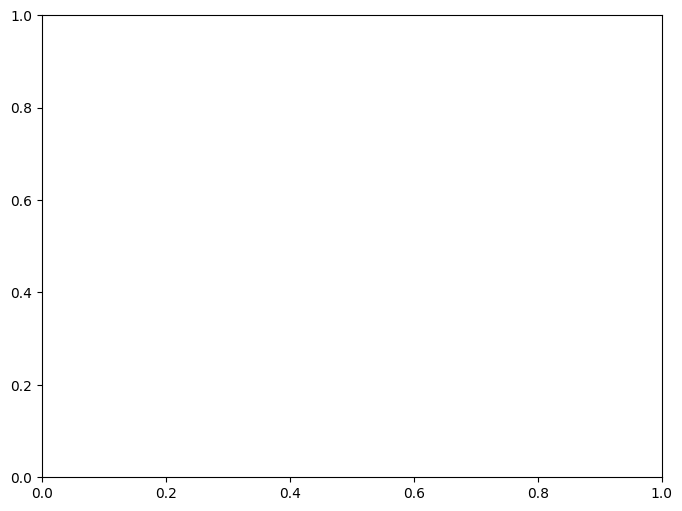

In [29]:
#ALL VALUES (EXCLUDING KNOWN PHYSICAL CONSTANTS) WERE RETRIEVED DIRECTLY OR INDIRECTLY FROM OM10
#LINK: https://arxiv.org/pdf/1001.2037.pdf (section 2.3)

import math
import numpy as np
from astropy.cosmology import FlatLambdaCDM, Planck18
import matplotlib.pyplot as plt

def calc_lum(z, i_mag, abs_mag, alpha, beta, phi, threshold_z):
    quasar_lum_list = []
    for i in range(len(i_mag)):
        z = 1.5
        alpha = -3.31  # bright end of the slope (when z < 3) (constant given)
        beta = -1.45   # faint end of the slope (constant given)
        beta1 = alpha + 10**(0.4 * (beta + 1) * (i_mag[i] - abs_mag[i]))
        quasar_lum = phi / (alpha + beta1)
        quasar_lum_list.append(quasar_lum)

    return quasar_lum_list

class Luminosity:
    def __init__(self):
        # Constants for quasars - all given values used to reproduce the luminosity function
        self.zeta = 2.98
        self.xi = 4.08
        self.zstar = 1.60
        
        # Constants for luminosity function
        self.alpha = -3.31  # bright end of the slope (when z < 3) (constant given)
        self.beta = -1.45   # faint end of the slope (constant given)
        self.phi = 5.35e-6

        # Define redshift value
        self.z = 1.5

        # Create an array of absolute i-band magnitudes
        self.i_mag = np.arange(1e-30, 1e-24, 2e-27)

        # Calculate some intermediate values
        self.exp_zeta_z = np.exp(self.zeta * self.z)
        self.exp_xi_zstar = np.exp(self.xi * self.zstar)
        self.exp_xi_z = np.exp(self.xi * self.z)

        # Calculate fz
        self.calc_fz()

        # Create a cosmology instance using Planck18
        self.cosmo = Planck18.clone(H0=68.11, Om0=0.3)

        # Calculate luminosity distance
        self.luminosity_distance = self.cosmo.luminosity_distance(self.z)

        # Calculate break absolute magnitude
        self.abs_mag = (-20.90) + 5 * np.log10(self.luminosity_distance.value) - 2.5 * np.log10(self.fz)


    def calc_fz(self):
        self.fz = (self.exp_zeta_z * (1 + self.exp_xi_zstar)) / \
                  ((np.sqrt(self.exp_xi_z)) + np.sqrt(self.exp_xi_zstar))**2

    def calc_pop_density(self):
        quasar_pd_list = []
        for i in range(len(self.i_mag)):
            beta1 = self.alpha + 10**(0.4 * (self.beta + 1) * (self.i_mag[i] - self.abs_mag))
            quasar_pd = self.phi / (self.alpha + beta1)
            quasar_pd_list.append(quasar_pd)

        return quasar_pd_list

    def print_quasar_lum(self):
        for i in range(len(self.i_mag)):
            print(f"z = {self.z:.2f}, Quasar Luminosity = {self.calc_pop_density()[i]:.5e} mag^-1 Mpc^-3")


    def print_pop_density(self):
        quasar_pd_list = self.calc_pop_density()

        for i in range(len(self.i_mag)):
            print(f"z = {self.z:.2f}, Quasar Population Density = {quasar_pd_list[i]:.5e} mag^-1 Mpc^-3")

    def plot_pop_density(self):
        quasar_pd_list = self.calc_pop_density()

        # Create a plot
        plt.figure(figsize=(8, 6))
        plt.scatter(self.z, quasar_pd_list, label="Quasar Population Density")

        # Set custom axis limits for the x and y axes
        plt.xlim(1e-30, 1e-24)

        # Add labels and legend
        plt.xlabel("i-band Magnitude (M)")
        plt.ylabel("Luminosity Function (mag^-1 Mpc^-3)")
        #plt.ylabel("Quasar Population Density (mag^-1 Mpc^-3)")
        plt.title("Quasar Population Density vs. Redshift")
        plt.legend()

        # Show plot
        plt.show()

# Instantiate the Quasar class
quasars = Luminosity()

# Print quasar luminosity funcition at different redshifts
quasars.print_quasar_lum()

# Print quasar population density at different redshifts
quasars.print_pop_density()

# Plot quasar population density at all redshifts
quasars.plot_pop_density()
